# Overview of Dataset
**This dataset contains 4242 images of flowers.The data collection is based on the data flicr, google images, yandex images.You can use this datastet to recognize plants from the photo.The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        filepath = os.path.join(dirname, filename)
        print(filepath)



# Any results you write to the current directory are saved as output.

./input/.DS_Store
./input/flowers/.DS_Store
./input/flowers/daisy/14167534527_781ceb1b7a_n.jpg
./input/flowers/daisy/34718882165_68cdc9def9_n.jpg
./input/flowers/daisy/5512287917_9f5d3f0f98_n.jpg
./input/flowers/daisy/476857510_d2b30175de_n.jpg
./input/flowers/daisy/521762040_f26f2e08dd.jpg
./input/flowers/daisy/33837577463_1ae52a3726_n.jpg
./input/flowers/daisy/34638378196_216d5bbc2e_n.jpg
./input/flowers/daisy/7320089276_87b544e341.jpg
./input/flowers/daisy/8008258043_5457dd254b_n.jpg
./input/flowers/daisy/721595842_bacd80a6ac.jpg
./input/flowers/daisy/8719756744_34a5a83976_n.jpg
./input/flowers/daisy/5110107234_12ddc0206b_m.jpg
./input/flowers/daisy/20773528301_008fcbc5a1_n.jpg
./input/flowers/daisy/144076848_57e1d662e3_m.jpg
./input/flowers/daisy/510844526_858b8fe4db.jpg
./input/flowers/daisy/5632774792_0fa33d17eb_n.jpg
./input/flowers/daisy/12891819633_e4c82b51e8.jpg
./input/flowers/daisy/7630517248_98fb8bee1f_n.jpg
./input/flowers/daisy/3706420943_66f3214862_n.jpg
./input/flowers

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.applications import VGG19
from keras.applications import ResNet50
import cv2
import os
import random
import tensorflow as tf

# Loading the Dataset

In [3]:
labels = ['dandelion', 'daisy', 'tulip', 'sunflower', 'rose']
img_size = 224

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

data = get_data("input/flowers")

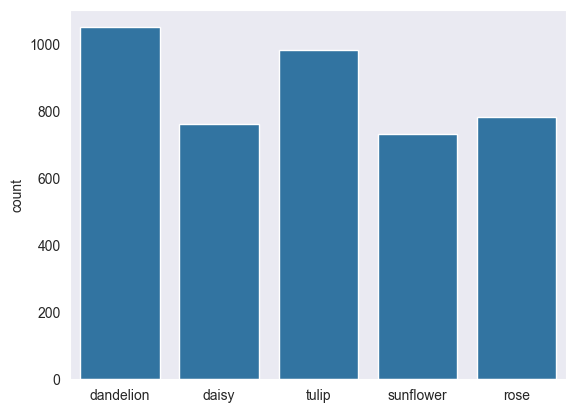

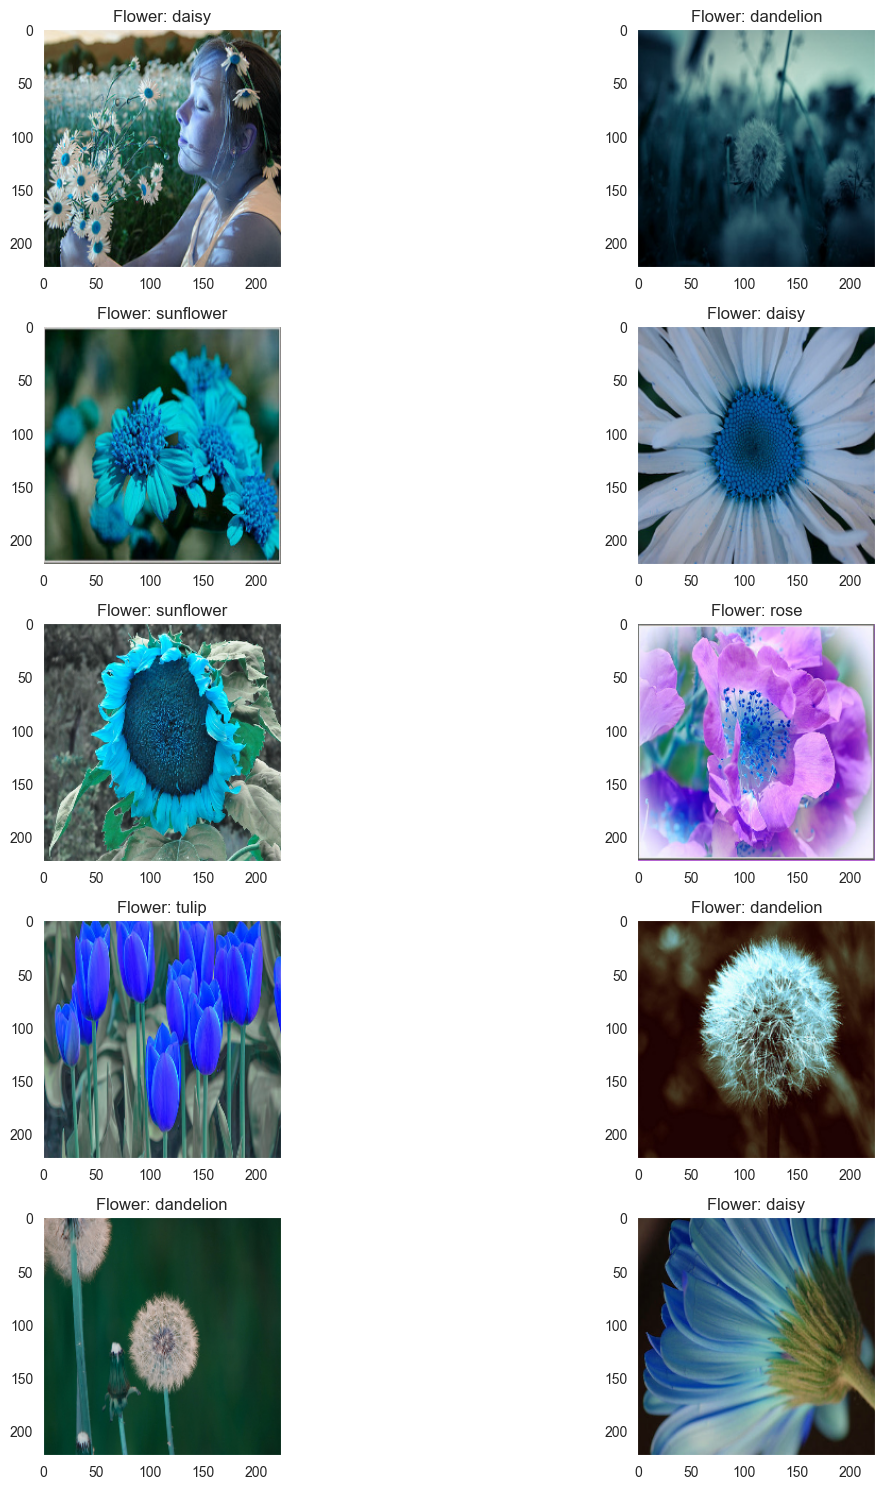

REPLICAS:  1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ ?                      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 4,719,616 (18.00 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

Epoch 1/12


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/54 ━━━━━━━━━━━━━━━━━━━━ 3:08 5s/step - accuracy: 0.2676 - loss: 2.4695

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import cv2
import random

labels = ['dandelion', 'daisy', 'tulip', 'sunflower', 'rose']
img_size = 224

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

data = get_data("input/flowers")

# Plotting the distribution of the data
l = [labels[i[1]] for i in data]
sns.set_style('dark')
sns.countplot(x=l)
plt.show()

# Displaying some sample images
fig, ax = plt.subplots(5, 2, figsize=(15, 15))
for i in range(5):
    for j in range(2):
        l = random.randint(0, len(data) - 1)
        ax[i, j].imshow(data[l][0])
        ax[i, j].set_title('Flower: ' + labels[data[l][1]])
plt.tight_layout()
plt.show()

x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

# Normalize the data
x = np.array(x) / 255.0

# Reshaping the data from 1-D to 3-D as required through input by CNN's 
x = x.reshape(-1, img_size, img_size, 3)
y = np.array(y)

label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

del x, y, data

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Detect hardware, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except ValueError:
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

# Load the VGG19 model with local weights
with strategy.scope():
    pre_trained_model = VGG19(input_shape=(224, 224, 3), include_top=False, weights="/Users/lotannaokeke/Downloads/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5")

    for layer in pre_trained_model.layers[:19]:
        layer.trainable = False

    model = Sequential([
        pre_trained_model,
        MaxPool2D((2, 2), strides=2),
        Flatten(),
        Dropout(0.5), # Adding dropout layer
        Dense(256, activation='relu', kernel_regularizer=l2(0.001)), # Adding L2 regularization
        Dropout(0.5), # Adding another dropout layer
        Dense(5, activation='softmax')
    ])
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.3, min_lr=0.000001)

history = model.fit(datagen.flow(x_train, y_train, batch_size=64), epochs=12, validation_data=(x_test, y_test), callbacks=[learning_rate_reduction])

print("Loss of the model is - ", model.evaluate(x_test, y_test)[0])
print("Accuracy of the model is - ", model.evaluate(x_test, y_test)[1] * 100, "%")

epochs = [i for i in range(12)]
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

ax[0].plot(epochs, train_acc, 'go-', label='Training Accuracy')
ax[0].plot(epochs, val_acc, 'ro-', label='Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs, train_loss, 'g-o', label='Training Loss')
ax[1].plot(epochs, val_loss, 'r-o', label='Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()


In [ ]:
# Make predictions
predictions_prob = model.predict(x_test)
predictions = np.argmax(predictions_prob, axis=1)

# Inverse transform the one-hot encoded test labels
y_test_inv = label_binarizer.inverse_transform(y_test)

# Print classification report
print(classification_report(y_test_inv, predictions, target_names=labels))

# Plot confusion matrix
cm = confusion_matrix(y_test_inv, predictions)
cm = pd.DataFrame(cm, index=labels, columns=labels)

plt.figure(figsize=(10, 10))
sns.heatmap(cm, cmap="Blues", linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=labels, yticklabels=labels)

# Storing some properly classified and misclassified indexes
prop_class = []
mis_class = []

for i in range(len(y_test_inv)):
    if y_test_inv[i] == predictions[i] and len(prop_class) < 8:
        prop_class.append(i)
    if y_test_inv[i] != predictions[i] and len(mis_class) < 8:
        mis_class.append(i)

# Plot properly classified examples
count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)
for i in range(4):
    for j in range(2):
        ax[i, j].imshow(x_test[prop_class[count]])
        ax[i, j].set_title("Predicted Flower: " + labels[predictions[prop_class[count]]] + "\n" + "Actual Flower: " + labels[y_test_inv[prop_class[count]]])
        plt.tight_layout()
        count += 1

# Plot misclassified examples
count = 0
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)
for i in range(4):
    for j in range(2):
        ax[i, j].imshow(x_test[mis_class[count]])
        ax[i, j].set_title("Predicted Flower: " + labels[predictions[mis_class[count]]] + "\n" + "Actual Flower: " + labels[y_test_inv[mis_class[count]]])
        plt.tight_layout()
        count += 1
